## Online Payments Fraud Detection: Blossom Bank (BB PLC) Case Study

Blossom Bank (BB PLC) is a leading multinational financial services group headquartered in London, UK. The bank provides a wide range of services, including:

- Retail and investment banking
- Pension management
- Asset management
- Payment services

### Project Overview

Blossom Bank aims to develop a machine learning model to predict online payment fraud. This initiative is designed to enhance the bank’s ability to detect fraudulent activities in real time, leveraging advanced data-driven techniques.

**Task Type:** Binary Classification  
**Approach:** Supervised Learning Algorithms  

### Project Objectives

- **Combat Evolving Threats:**  
  Stay ahead of rapidly changing technological threats and minimize financial losses due to fraudulent transactions.

- **Anomaly Detection:**  
  Accurately identify and flag suspicious online transactions that may bypass traditional rules-based systems.

- **Enhance Customer Trust:**  
  Improve quality assurance, retain existing customers, and attract new ones—ultimately increasing the bank’s credit and profit base.

- **Informed Decision-Making:**  
  Provide actionable insights to strengthen policies and support strategic decision-making.

---

By implementing a robust fraud detection model, Blossom Bank seeks to reinforce its security infrastructure, protect customer assets, and maintain its reputation as a trusted financial institution.

In [1]:
#import the libaries to work with for EDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the data set
data = pd.read_csv(r"C:\Users\anjal\Documents\Online Payment Fraud Detection.csv",encoding='unicode-escape')

## Understanding the Data

In [3]:
# Checking the size of the dataset (Rows,Columns)
data.shape

(1048575, 10)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [7]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [9]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [10]:
# Checking for missing data using isna().sum()
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

## Relationships and Insights

In [11]:
# Checking which recipients stand out 
data.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1355182933',
       'M1964992463', 'M677577406'], dtype=object)

In [12]:
# Investigating to check unique customers
data.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2037964975',
       'C1633237354', 'C1264356443'], dtype=object)

In [13]:
# Investigating to check how many times a customer started a transaction
data.nameOrig.value_counts()

nameOrig
C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: count, Length: 1048317, dtype: int64

In [14]:
# How many times a recipient received a transaction
data.nameDest.value_counts()

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: count, Length: 449635, dtype: int64

In [15]:
data.amount.max()

10000000.0

In [16]:
# Checking how many times a particular type of transection was carried out

data.type.value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

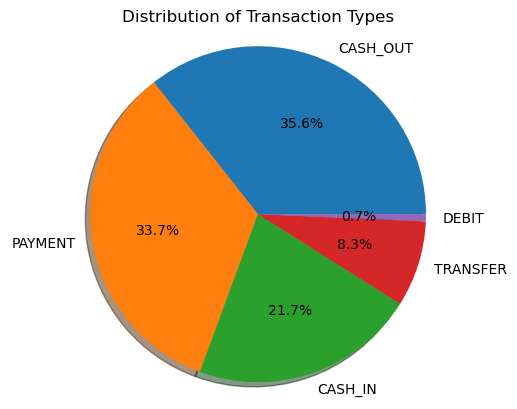

In [17]:
# Checking the distribution of transaction types
data['type'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    shadow=True,  
    ylabel='', 
    title='Distribution of Transaction Types'
)
plt.axis('equal')
plt.show()

In [18]:
# Investigating the top customers and the type of transactions they initiated
top_ten = data.groupby('nameOrig').type.sum().sort_values(ascending=False)[:10]
top_ten

nameOrig
C24957224      TRANSFERTRANSFER
C1378765159    TRANSFERTRANSFER
C813633808     TRANSFERTRANSFER
C940075559     TRANSFERTRANSFER
C1709295811     TRANSFERPAYMENT
C196315367      TRANSFERPAYMENT
C1077087409     TRANSFERPAYMENT
C495164373      TRANSFERPAYMENT
C192628069      TRANSFERPAYMENT
C1039623203     TRANSFERPAYMENT
Name: type, dtype: object

In [19]:
# Checking the average amount transacted
data['amount'].mean()

158666.9755271392

## Visualizing the Distribution of Transaction Times

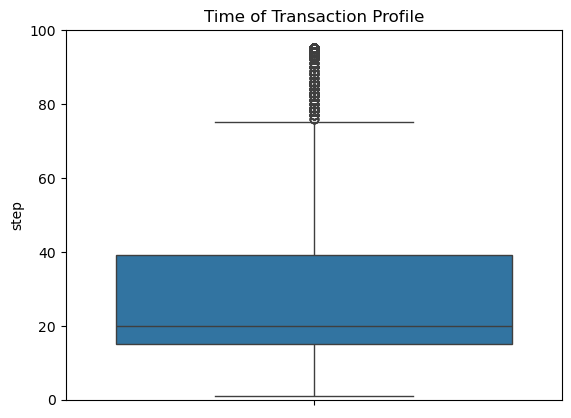

In [20]:
sns.boxplot(y=data.step)
plt.title('Time of Transaction Profile')
plt.ylim(0,100)
plt.show()

## Visualizing Transaction Amounts with a Histogram

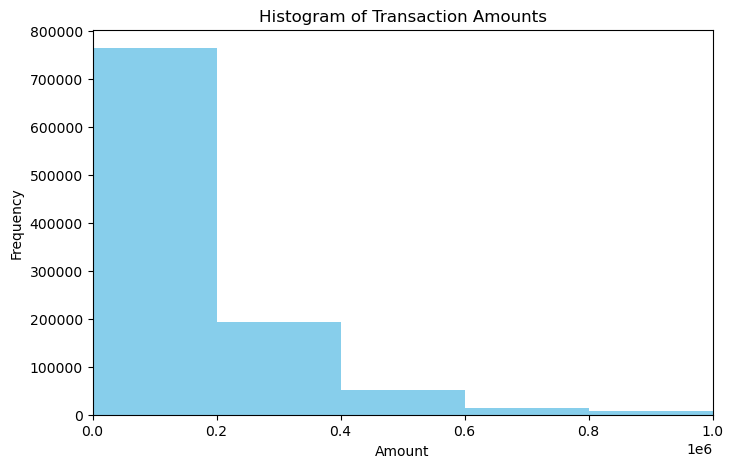

In [21]:
plt.figure(figsize=(8,5))
plt.hist(data['amount'], bins=50, color='skyblue')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, 1000000)  # Focus on the most relevant range
plt.show()

## Visualizing Fraudulent vs. Non-Fraudulent Transactions

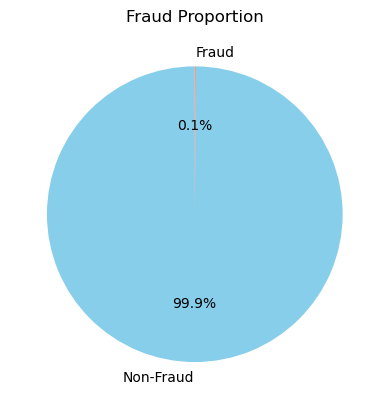

In [22]:
data['isFraud'].value_counts().plot.pie(
    labels=['Non-Fraud', 'Fraud'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title('Fraud Proportion')
plt.ylabel('')
plt.show()

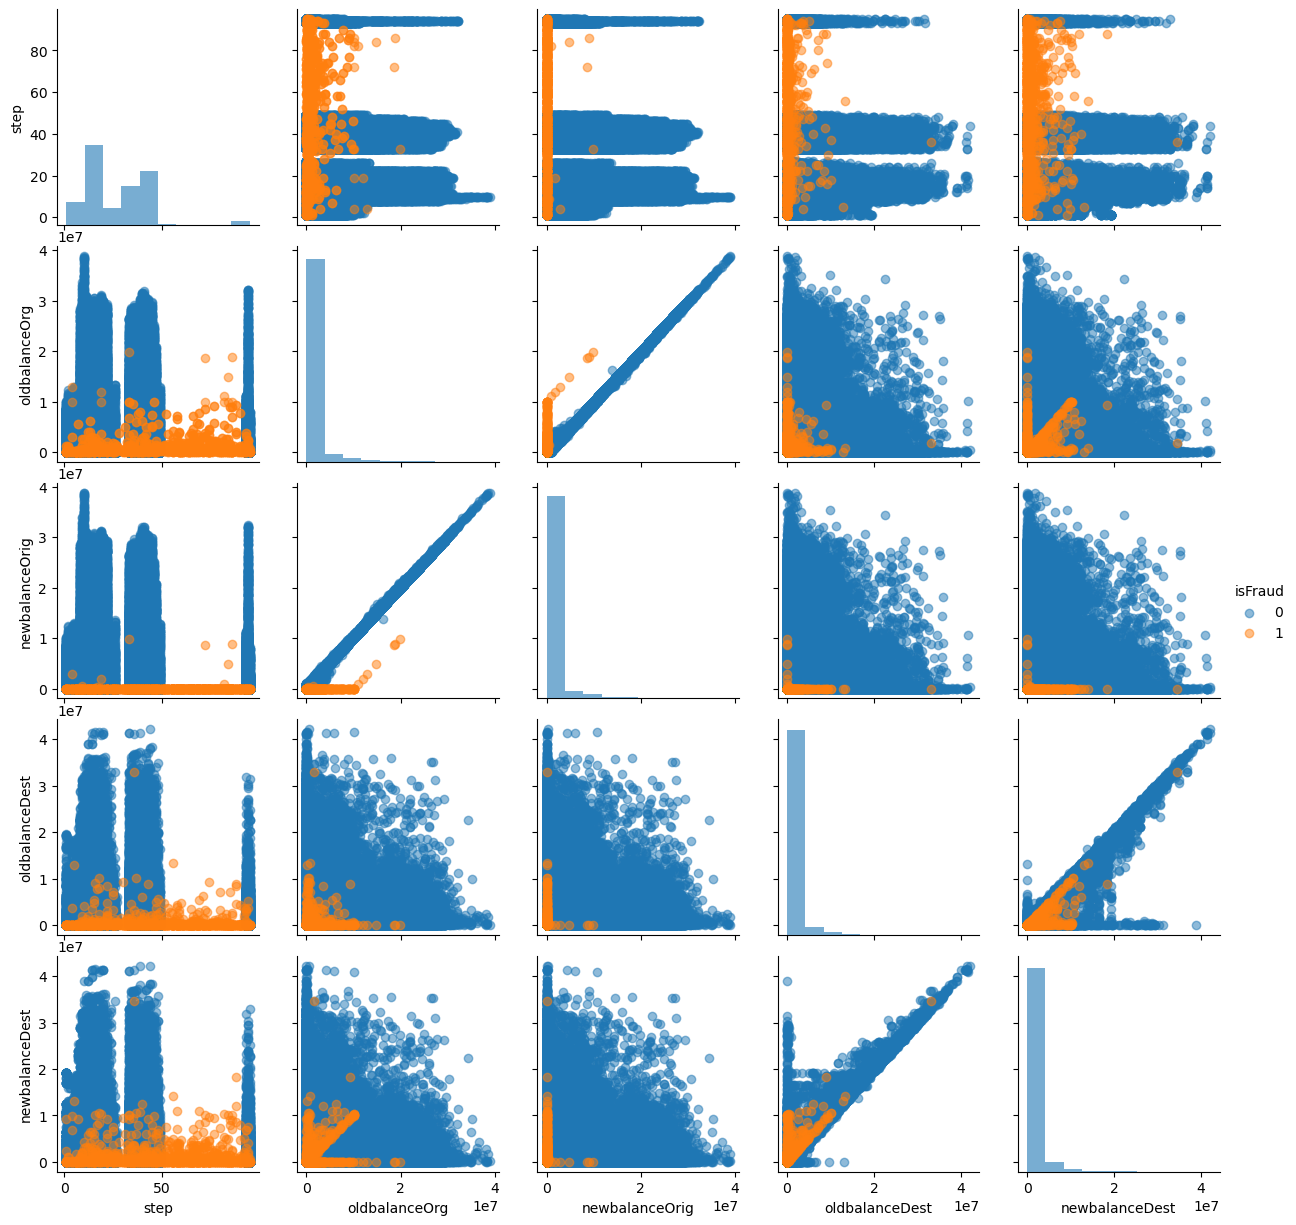

In [23]:
# Visualising the spread of fraud variables across the dataset

Online_Payment_layout = sns.PairGrid(data, vars=['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], hue= 'isFraud')

Online_Payment_layout.map_diag(plt.hist, alpha = 0.6)
Online_Payment_layout.map_offdiag(plt.scatter, alpha = 0.5)
Online_Payment_layout.add_legend()
plt.show()

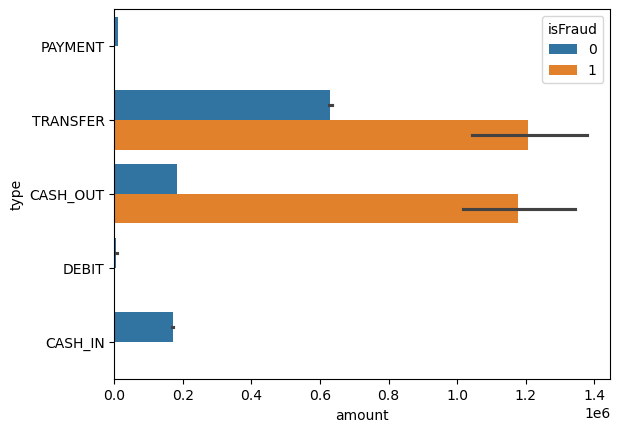

In [24]:
sns.barplot(x='amount', y='type', hue='isFraud', data=data)
plt.show()

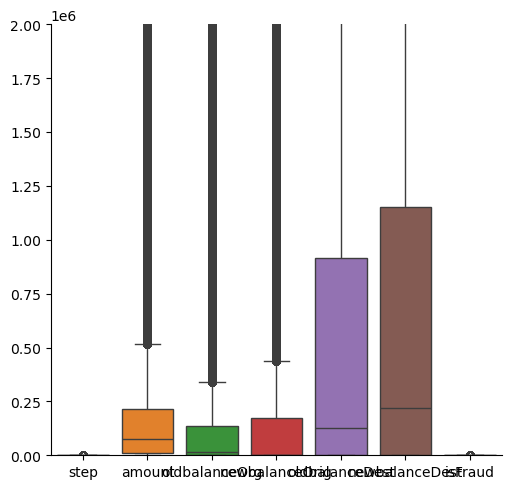

In [25]:
sns.catplot(data=data,kind='box')

plt.ylim(0,2000000)
plt.show()

In [26]:
# Sepearating Fraudulent transaction from non fraudulent

Fraudulent_Transaction = data[data.isFraud ==1]
Not_Fraudulent_Transaction = data[data.isFraud ==0]

In [27]:
print('Fraudulent Transaction: {}'.format(len(Fraudulent_Transaction)))
print('Not Fraudulent Transaction: {}'.format(len(Not_Fraudulent_Transaction)))
   

Fraudulent Transaction: 1142
Not Fraudulent Transaction: 1047433


In [28]:
#Understanding The statistical nature of Non Fraudulent Transactions.

Not_Fraudulent_Transaction.amount.describe()

count    1.047433e+06
mean     1.575397e+05
std      2.541883e+05
min      1.000000e-01
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      6.419835e+06
Name: amount, dtype: float64

In [29]:
#Understanding The statistical nature of Fraudulent Transactions.

Fraudulent_Transaction.amount.describe()

count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

In [30]:
data.sample(10000, random_state=42).groupby('isFraud').mean(numeric_only=True)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,26.929702,1.591889e+05,8.758944e+05,897408.716127,966542.294271,1.104881e+06
1,43.571429,1.234952e+06,1.232115e+06,0.000000,221391.428571,1.713396e+06


## Undersampling

It is a technique used to balance an imbalanced dataset by reducing the number of samples in the majority class so that it matches the size of the minority class. This helps prevent models from being biased toward the majority class during training.

Since we want to build a model that detects Fraud, we base our sampling on the number of transactions classed as fraudulent in our original dataset.

Fraudulent transactions: 1142

In [31]:
Non_Fraudulent_Sample = Not_Fraudulent_Transaction.sample(n=1142)

In [32]:
# Joining the two dataframes

new_dataset = pd.concat([Non_Fraudulent_Sample, Fraudulent_Transaction], axis=0)

In [33]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
695254,36,TRANSFER,9747.01,C1659873599,0.0,0.00,C1851696243,156881.26,166628.27,0
360160,17,CASH_OUT,61062.13,C762267011,14404.0,0.00,C966243213,1049016.22,1202468.64,0
169522,12,CASH_OUT,135664.78,C263908402,0.0,0.00,C374377597,164226.46,247272.49,0
168718,12,CASH_OUT,406650.78,C1466283563,11647.0,0.00,C1049438572,0.00,406650.78,0
590488,33,PAYMENT,5415.34,C369798212,299507.0,294091.66,M1033925964,0.00,0.00,0


In [34]:
new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1
1048324,95,CASH_OUT,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1


In [38]:
new_dataset['isFraud'].value_counts()

isFraud
0    1142
1    1142
Name: count, dtype: int64

In [39]:
new_dataset.shape

(2284, 10)

In [42]:
# Investigating if the new dataset we obtained is good i.e., does not deviate significantly from our original dataset
new_dataset.groupby('isFraud').mean(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,27.561296,1.566192e+05,8.279505e+05,849618.239046,953479.497960,1.086467e+06
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06


With the new, balanced dataset addressing class imbalance, we are now well-positioned to proceed with data splitting for feature selection, target definition, and model training.

## Feature Engineering
To effectively train and evaluate our machine learning model, it is essential to carefully select relevant features (columns) from the dataset. Since our data includes categorical variables such as 'nameOrig' and 'nameDest', these need to be transformed into a numerical format suitable for machine learning algorithms.

This transformation is achieved through one-hot encoding, which converts categorical values into a binary matrix, enabling the model to interpret and utilize these features effectively.

By performing these preprocessing steps, we ensure that our dataset is optimally structured for robust model development and accurate predictions.

In [43]:
# One-hot Encoding.
#Importing library

from sklearn.preprocessing import OneHotEncoder

In [45]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop=None,)

In [46]:
#perform one-hot encoding on 'type' column 
encoder_df =  pd.get_dummies(
    new_dataset,
    columns=['type','nameOrig','nameDest'],
    prefix=['type','nameOrig','nameDest'])

In [47]:
encoder_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M946259637,nameDest_M95197000,nameDest_M965512855,nameDest_M972180840,nameDest_M976919691,nameDest_M98535420,nameDest_M986677269,nameDest_M987361959,nameDest_M995992617,nameDest_M997105891
695254,36,9747.01,0.00,0.00,156881.26,166628.27,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
360160,17,61062.13,14404.00,0.00,1049016.22,1202468.64,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
169522,12,135664.78,0.00,0.00,164226.46,247272.49,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
168718,12,406650.78,11647.00,0.00,0.00,406650.78,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
590488,33,5415.34,299507.00,294091.66,0.00,0.00,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,56745.14,56745.14,0.00,51433.88,108179.02,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048221,95,33676.59,33676.59,0.00,0.00,0.00,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048222,95,33676.59,33676.59,0.00,0.00,33676.59,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048323,95,87999.25,87999.25,0.00,0.00,0.00,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
encoder_df.shape

(2284, 4553)

In [49]:
# Check result of one-hot encoding
encoder_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M946259637,nameDest_M95197000,nameDest_M965512855,nameDest_M972180840,nameDest_M976919691,nameDest_M98535420,nameDest_M986677269,nameDest_M987361959,nameDest_M995992617,nameDest_M997105891
695254,36,9747.01,0.0,0.00,156881.26,166628.27,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
360160,17,61062.13,14404.0,0.00,1049016.22,1202468.64,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
169522,12,135664.78,0.0,0.00,164226.46,247272.49,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
168718,12,406650.78,11647.0,0.00,0.00,406650.78,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
590488,33,5415.34,299507.0,294091.66,0.00,0.00,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
encoder_df.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M946259637,nameDest_M95197000,nameDest_M965512855,nameDest_M972180840,nameDest_M976919691,nameDest_M98535420,nameDest_M986677269,nameDest_M987361959,nameDest_M995992617,nameDest_M997105891
1047888,95,56745.14,56745.14,0.0,51433.88,108179.02,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048221,95,33676.59,33676.59,0.0,0.00,0.00,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048222,95,33676.59,33676.59,0.0,0.00,33676.59,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048323,95,87999.25,87999.25,0.0,0.00,0.00,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048324,95,87999.25,87999.25,0.0,0.00,87999.25,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## Target and Feature Selection
Target Selection
The isFraud column has been chosen as the target variable (Y), representing whether a transaction is fraudulent or not. This will serve as the outcome that our machine learning model aims to predict.

In [51]:
Y = encoder_df['isFraud']

In [52]:
features = encoder_df.drop('isFraud' , axis=1)

In [53]:
X = features

In [54]:
Y.head()

695254    0
360160    0
169522    0
168718    0
590488    0
Name: isFraud, dtype: int64

In [55]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,...,nameDest_M946259637,nameDest_M95197000,nameDest_M965512855,nameDest_M972180840,nameDest_M976919691,nameDest_M98535420,nameDest_M986677269,nameDest_M987361959,nameDest_M995992617,nameDest_M997105891
695254,36,9747.01,0.0,0.00,156881.26,166628.27,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
360160,17,61062.13,14404.0,0.00,1049016.22,1202468.64,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
169522,12,135664.78,0.0,0.00,164226.46,247272.49,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
168718,12,406650.78,11647.0,0.00,0.00,406650.78,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
590488,33,5415.34,299507.0,294091.66,0.00,0.00,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#create X_train, X_test, Y_train, Y_test
# using test_size of 20%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size=0.2,
                                                    stratify=Y,
                                                    random_state=2)

In [58]:
print('\n',X_train.head(2))

print('\n',X_test.head(2))

print('\n',Y_train.head(2))

print('\n',Y_test.head(2))


          step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1030484    67  106460.70       106460.7            0.00      1414263.15   
68832       9   13103.79        21958.0         8854.21            0.00   

         newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
1030484      1520723.84         False           True       False   
68832              0.00         False          False       False   

         type_PAYMENT  ...  nameDest_M946259637  nameDest_M95197000  \
1030484         False  ...                False               False   
68832            True  ...                False               False   

         nameDest_M965512855  nameDest_M972180840  nameDest_M976919691  \
1030484                False                False                False   
68832                  False                False                False   

         nameDest_M98535420  nameDest_M986677269  nameDest_M987361959  \
1030484               False                False         

## Training the Classification Model with Logistic Regression
Logistic Regression is a widely used algorithm for binary classification problems, such as fraud detection. It models the probability that a given input belongs to a particular class—in this case, whether a transaction is fraudulent (isFraud = 1) or not (isFraud = 0)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()

In [61]:
#Training model with Training data

model.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
model_pred = model.predict(X_test)

In [63]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

## Logistic Regression Model Evaluation

In [81]:
#importing the methods
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [66]:
print('\nClassification Report:')
print(classification_report(Y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       229
           1       0.92      0.90      0.91       228

    accuracy                           0.91       457
   macro avg       0.91      0.91      0.91       457
weighted avg       0.91      0.91      0.91       457



In [67]:
# check True Negatives/Positives, False Negatives/Positives

pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),212,17
Actually Positive(1),22,206


In [68]:
# Print confusion matrix using predictions in context 

pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),212,17
Actually Fraud(1),22,206


In [69]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9146608315098468


In [70]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.8827714653670118

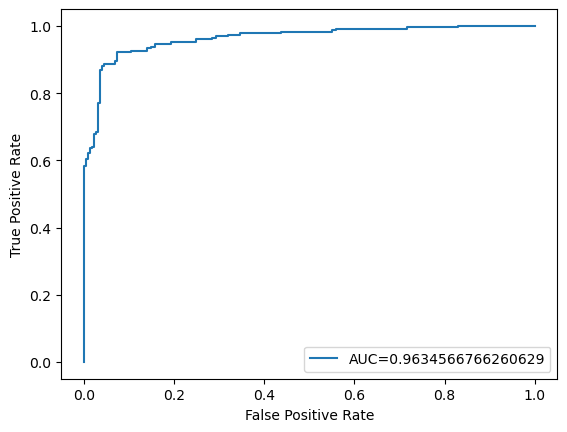

In [71]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [72]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.9634566766260629


The ROC curve (Receiver Operating Characteristic curve) is a powerful tool for evaluating the performance of a classification model. It illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate across various threshold settings, providing insight into the model’s ability to distinguish between the positive and negative classes.

The AUC (Area Under the Curve) quantifies this performance:

A higher AUC value indicates a better model, with 1.0 representing a perfect classifier and 0.5 indicating no discriminative ability (equivalent to random guessing).

The AUC is often considered a more informative metric than simple accuracy, especially for imbalanced datasets, as it takes into account both sensitivity and specificity.

For example, an AUC score of 0.97 means that the model has a 97% chance of correctly distinguishing between a randomly chosen positive instance and a randomly chosen negative instance, reflecting excellent classification performance.

## Training with Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Define the model as the random forest

model = RandomForestClassifier(random_state=5, n_estimators=20)

In [75]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [76]:
model_pred = model.predict(X_test)

In [77]:
# Obtain model probabilities

probs = model.predict_proba(X_test)

## Random Forest Model Evaluation

In [79]:
#importing the methods
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [82]:
# Print classification report using predictions

print('Classification_Report:\n',classification_report(Y_test, model_pred))

Classification_Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       229
           1       0.98      0.96      0.97       228

    accuracy                           0.97       457
   macro avg       0.97      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457



In [83]:
# Print confusion matrix using predictions

pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),224,5
Actually Positive(1),10,218


In [84]:
# Print confusion matrix using predictions in Context

pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),224,5
Actually Fraud(1),10,218


In [85]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9671772428884027


In [86]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.9565840644924614

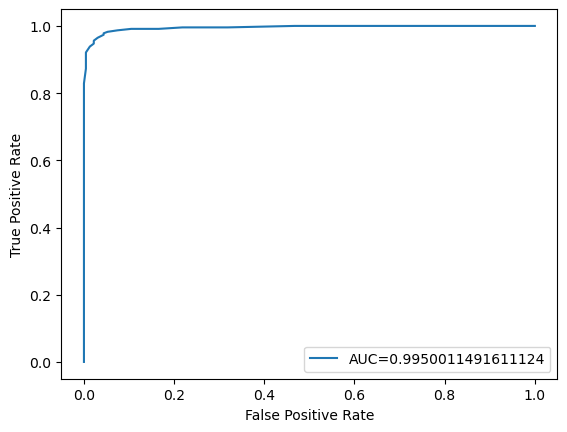

In [87]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [88]:
# Print ROC_AUC score using probabilities
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:, 1]))

AUC Score:
0.9950011491611124


An AUC score of 0.99 suggests that our Random Forest Model is almost perfect with 99% correct Predictions.

## Conclusion
In this project, we developed a robust machine learning pipeline to detect fraudulent online payment transactions for Blossom Bank (BB PLC). The workflow included comprehensive data exploration, addressing class imbalance, feature engineering, and the application of both Logistic Regression and Random Forest classifiers.

Key steps and findings include:

*  Data Preprocessing:
We explored the dataset, handled missing values, and addressed class imbalance to ensure reliable model training.

* Feature Engineering:
Categorical variables were transformed using one-hot encoding, making the data suitable for machine learning algorithms.

*  Model Training and Evaluation:
Both Logistic Regression and Random Forest classifiers were trained and evaluated. Performance was assessed using metrics such as precision, recall, F1-score, and ROC-AUC, with the Random Forest model achieving a high AUC score, indicating excellent discrimination between fraudulent and legitimate transactions.

* Interpretation:
The ROC curve and confusion matrix provided clear insights into the model’s strengths and areas for improvement, ensuring that the solution is both effective and interpretable.

Overall, the project demonstrates the effectiveness of machine learning in identifying fraudulent transactions, providing Blossom Bank with a valuable tool to enhance security, reduce financial losses, and build customer trust. The methodology and models developed here can be further refined and scaled to adapt to evolving fraud patterns in the financial industry.

